In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [21]:
csv_files = []


dif = os.getcwd()
for filename in os.listdir(dif):
    if filename.endswith(".csv"):
        csv_files.append(filename)

dfs = []
for file in csv_files:
    df = pd.read_csv(file, delimiter=";")
    dfs.append(df)
all_data = pd.concat(dfs)
all_data.to_csv('cubic_groups.csv')

/tmp/ipykernel_3620/1674878171.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat(dfs)


In [22]:
Vc = []
Vf = []
with open('fv-tab-all.tex') as f:
    for line in f:
        Vc.append(line.split(' & ')[4])
        Vf.append(line.split(' & ')[3])
for_all_c = []
for_all_f = []
for i in all_data['Spgr_N']:
    for_all_c.append(Vc[int(i) - 1])
    for_all_f.append(Vf[int(i)-1])
all_data['Vc'] = for_all_c
all_data['Vf'] = for_all_f

<Axes: title={'center': 'Pn-3n'}, xlabel='Группа симметрии', ylabel='Количество молекул'>

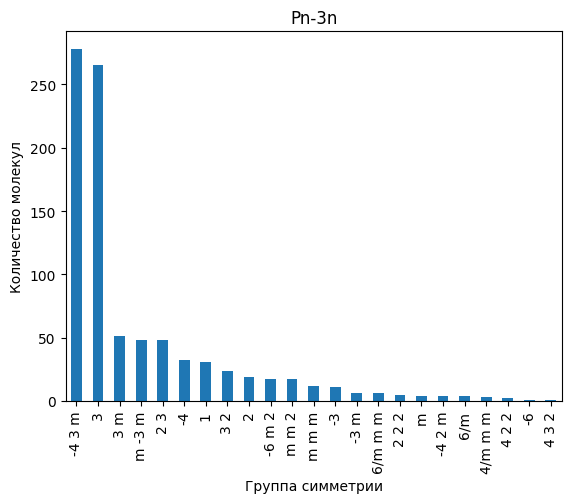

In [23]:
all_data['SymMol'] = all_data['SymMol'].astype(str)
all_data['Cryst_spgr'] = all_data['Cryst_spgr'].astype(str)
all_data['Formula'] = all_data['Formula'].astype(str)
all_data["SymMol"].value_counts().plot(kind="bar", title=file[:-8:], ylabel="Количество молекул", xlabel="Группа симметрии")

In [27]:
asym = all_data[all_data['SymMol'] == "1"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '4210'),
  Text(1, 0, '28830'),
  Text(2, 0, '19730'),
  Text(3, 0, '426'),
  Text(4, 0, '674'),
  Text(5, 0, '2175'),
  Text(6, 0, '139651'),
  Text(7, 0, '172'),
  Text(8, 0, '681'),
  Text(9, 0, '469'),
  Text(10, 0, '15250'),
  Text(11, 0, '1363')])

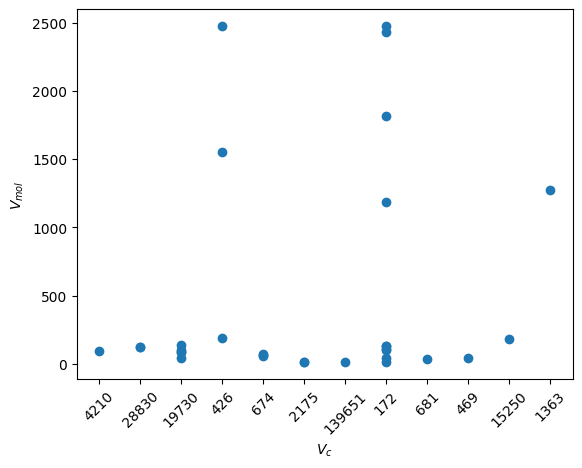

In [36]:
plt.scatter(asym['Vc'], asym['Mol_V'])
plt.xlabel(r'$V_c$')
plt.ylabel(r'$V_{mol}$')
plt.xticks(rotation=45)

Text(0, 0.5, '$V_{mol}$')

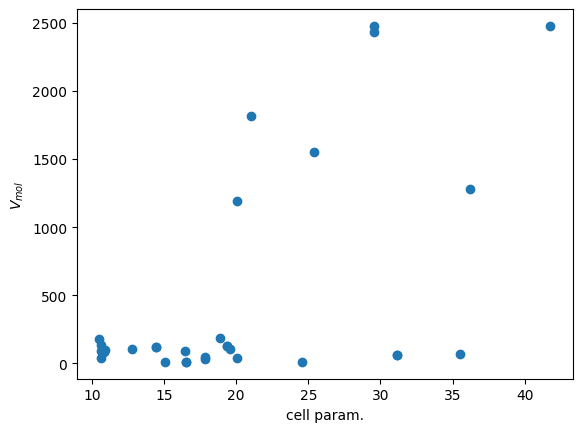

In [43]:
plt.scatter(asym['Cell_a'], asym['Mol_V'])
plt.xlabel('cell param.')
plt.ylabel(r'$V_{mol}$')

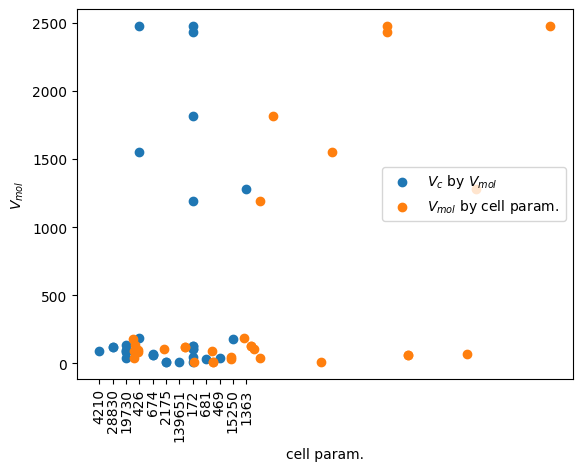

In [51]:
plt.scatter(asym['Vc'], asym['Mol_V'], label='$V_c$ by $V_{mol}$')
plt.xlabel(r'$V_c$')
plt.ylabel(r'$V_{mol}$')
plt.xticks(rotation=90)

# Создание второго графика и наложение его на первый
plt.scatter(asym['Cell_a'] - 8, asym['Mol_V'], label='$V_{mol}$ by cell param. ')
plt.xlabel('cell param.')
plt.ylabel(r'$V_{mol}$')

# Добавление легенды
plt.legend()

plt.show()